In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
df['species']=df['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
84,5.4,3.0,4.5,1.5,1
82,5.8,2.7,3.9,1.2,1
132,6.4,2.8,5.6,2.2,2
79,5.7,2.6,3.5,1.0,1
122,7.7,2.8,6.7,2.0,2


In [16]:
X=df.drop(labels='species',axis=1)

In [17]:
y=df['species']

C:\Users\abhyd\anaconda3\lib\site-packages\seaborn\relational.py:608: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = ax.scatter(scout_x, scout_y, **kws)


AttributeError: 'PathCollection' object has no property 'x'

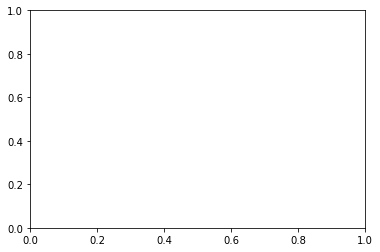

In [28]:
# sns.scatterplot(X=X,y=y)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [19]:
X_train.shape,X_test.shape

((100, 4), (50, 4))

In [23]:
from sklearn.svm import SVC
classifier=SVC(kernel='poly')

In [24]:
classifier.fit(X_train,y_train)

SVC(kernel='poly')

In [25]:
y_pred=classifier.predict(X_test)

In [26]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
mat=confusion_matrix(y_pred,y_test)
print(mat)
report=classification_report(y_pred,y_test)
print(report)

1.0
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [32]:
SVC.coef_

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
parameters={
    'C':[1,2,3,10,100],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':['scale', 'auto']
}
classifier_scv=SVC()

In [37]:
clf=GridSearchCV(classifier_scv,param_grid=parameters,verbose=True)

In [38]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=True)

In [39]:
clf.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [42]:
y_pred_=clf.predict(X_test)

In [43]:
y_pred_

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_pred_,y_test)
print(score)
mat=confusion_matrix(y_pred_,y_test)
print(mat)
report=classification_report(y_pred_,y_test)
print(report)

1.0
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

